In [1]:
import torch, torchvision
import torchvision.transforms as transforms
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [150]:
res18 = torchvision.models.resnet18(pretrained=True).eval()
res34 = torchvision.models.resnet50(pretrained=True).eval()


In [151]:
mob = torchvision.models.mobilenet_v2()

torch.Size([1, 3, 224, 224])


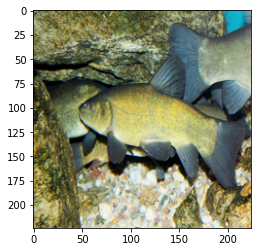

In [152]:
im = Image.open("tench.jpg").convert("RGB").resize((224,224))
plt.imshow(im)


transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

def invers_transform(data):
    transform = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])
    im = transform(data.data.squeeze()).numpy().transpose((1,2,0))*255
    return im.astype(np.uint8)
    

data = transform(im).unsqueeze(dim=0)
data.requires_grad=True
print(data.shape)

tensor([0])


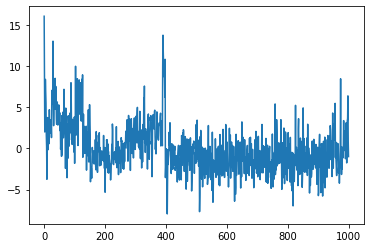

In [153]:


y = res18(data)
p = torch.nn.functional.softmax(y.detach(), dim=1)
label = y.argmax(dim=1)
print(label)
loss = torch.nn.functional.cross_entropy(y, label)
plt.plot(y.squeeze().detach().numpy())

In [155]:
imgs = []

for i in range(10):
    y = res18(data)
    y1 = res34(data)
    loss = torch.nn.functional.cross_entropy(y, label)
    print(loss)
    print(y.argmax()==label, y1.argmax()==label)
    loss.backward()
    data.data += data.grad/10
    data.grad.zero_()
    imgs.append(invers_transform(data.data))

tensor(0.3662, grad_fn=<NllLossBackward>)
tensor([True]) tensor([True])
tensor(0.9093, grad_fn=<NllLossBackward>)
tensor([True]) tensor([True])
tensor(2.4584, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(4.9935, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(7.5473, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(10.0523, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(12.4366, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(14.6211, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(16.5475, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])
tensor(18.3956, grad_fn=<NllLossBackward>)
tensor([False]) tensor([True])


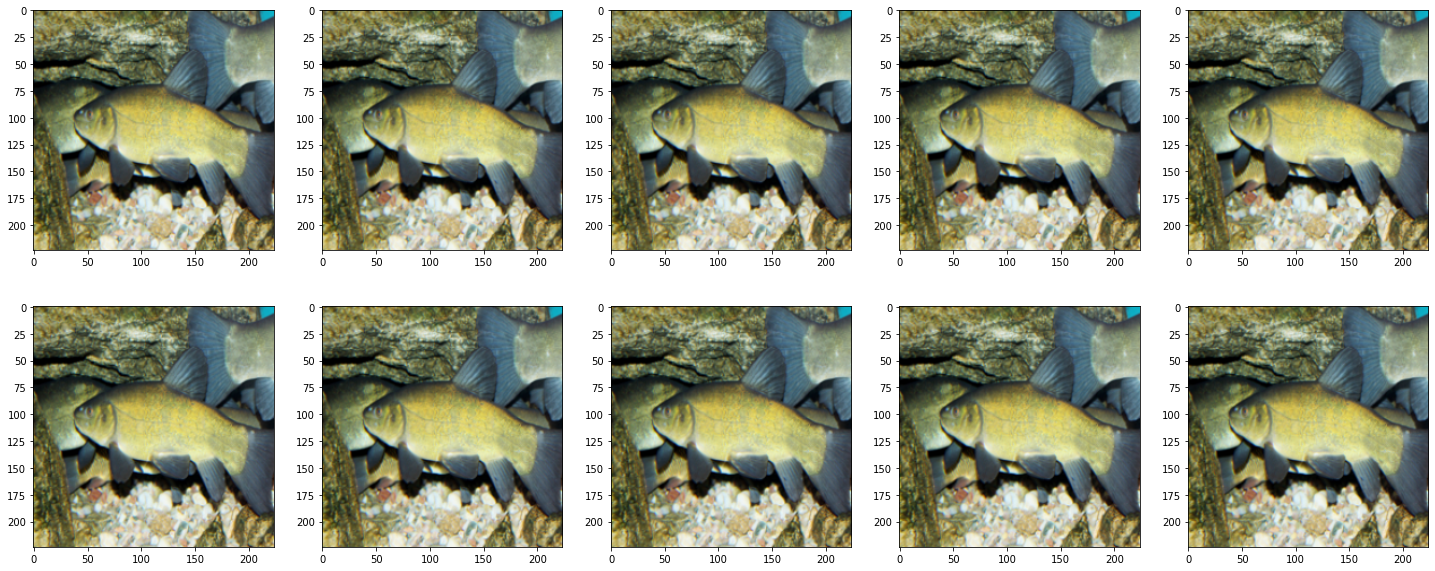

In [143]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))

for w in range(cols):
    for h in range(rows):
        idx = h*cols+w
        axes[h, w].imshow(imgs[idx])

In [137]:
len(imgs)

10